In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import random
import seaborn
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,save_model,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, BatchNormalization,Dropout
from tensorflow.keras.applications import DenseNet121

In [23]:
data_dir =r"E:\1. Thesis\PDD_MangoLeaf\Dataset"
keyword= ['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']

In [24]:
    train_datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    train_generator=train_datagen.flow_from_directory(
        'train',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
    )

Found 2400 images belonging to 8 classes.


In [25]:
    validation_datagen=ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical'
    )

Found 800 images belonging to 8 classes.


In [26]:
    test_datagen=ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

Found 800 images belonging to 8 classes.


In [27]:
num_classes=8
base_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(128,128,3))
base_model.trainable=True
#inputs=base_model.input
inputs = tf.keras.Input(shape=(128,128,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,095,304 (30.88 MB)

 Trainable params: 8,011,656 (30.56 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [29]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 615s 6s/step - accuracy: 0.3631 - loss: 1.7962 - val_accuracy: 0.5400 - val_loss: 1.5235
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step - accuracy: 0.8471 - loss: 0.7913 - val_accuracy: 0.7350 - val_loss: 0.9764
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step - accuracy: 0.9575 - loss: 0.3758 - val_accuracy: 0.7850 - val_loss: 0.7434
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.9683 - loss: 0.2255 - val_accuracy: 0.8138 - val_loss: 0.6418
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 464s 6s/step - accuracy: 0.9808 - loss: 0.1465 - val_accuracy: 0.8325 - val_loss: 0.5455
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 487s 6s/step - accuracy: 0.9782 - loss: 0.1208 - val_accuracy: 0.8288 - val_loss: 0.5368
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step - accuracy: 0.9886 - loss: 0.0817 - val_accuracy: 0.8413 - val_loss: 0.5037
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 451s 6s/step - accuracy: 0.9857 - loss: 0.0712 - val_accuracy: 0.8487 - v

In [ ]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

 6/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9901 - loss: 0.0757

In [9]:
predictions=model.predict(test_generator)
predicted_classes=np.argmax(predictions,axis=1)
ture_classes=test_generator.classes
class_labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
report=metrics.classification_report(ture_classes,predicted_classes,target_names=class_labels)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
                  precision    recall  f1-score   support

     Anthracnose       0.99      0.99      0.99       100
Bacterial Canker       0.98      1.00      0.99       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       1.00      0.97      0.98       100
      Gall Midge       0.70      1.00      0.82       100
         Healthy       0.76      1.00      0.87       100
  Powdery Mildew       0.85      1.00      0.92       100
     Sooty Mould       1.00      0.10      0.18       100

        accuracy                           0.88       800
       macro avg       0.91      0.88      0.84       800
    weighted avg       0.91      0.88      0.84       800



In [17]:
test_predictions=model.predict(test_generator)
trst_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


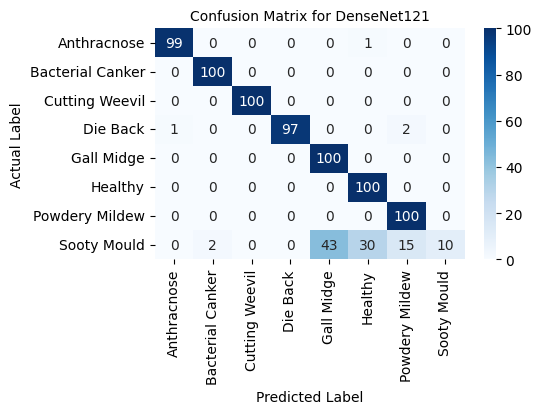

In [21]:
plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,trst_predicted_labels)
#class_names=[label for label in np.unique(df['label'])]
class_names=class_names=list(test_generator.class_indices.keys())
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for DenseNet121',fontsize=10)
plt.show()

In [ ]:
cmn=conf_matrix/conf_matrix.astype(float).sum(axis=1)
sns.heatmap(cmn,annot=True,fmt='.2f',cmap='Blues',xticklabels=class_names,yticklabels=class_names)